# **Step by Step Building of Shor's Algotithm** 

1. QFT : Quantum Fourior Transform 

## Basic Imports 

In [1]:
import numpy as np 
import qiskit as q
from qiskit import quantum_info as qi
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_histogram
from matplotlib import pyplot as plt
from IPython.display import display as disp
%matplotlib inline

## Quantum Fourior Transform 

In [2]:
style={"backgroundcolor": "black","linecolor": "#ddddee", "textcolor": "#fffffe",
       'subtextcolor':'fffffe','fontsize':12,'subfontsize':9,
       "displaycolor": {
        # "x": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        # "h": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        # "cx": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        # "ry": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        "measure":["#8900aa","white"]
    },
       }

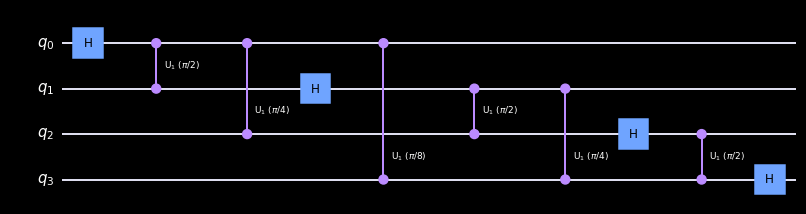

In [3]:
n_qubit = 4
fourior_circuit = q.QuantumCircuit(n_qubit, name = "QFT")

for qubit in range(n_qubit):
    fourior_circuit.h(qubit)
    for o_qubit in range(qubit+1,n_qubit):
        cu1 = q.circuit.library.CU1Gate(np.pi/(2**(o_qubit-qubit)))
        fourior_circuit.append(cu1,[o_qubit, qubit])
display(fourior_circuit.draw('mpl', style=style, fold=False))



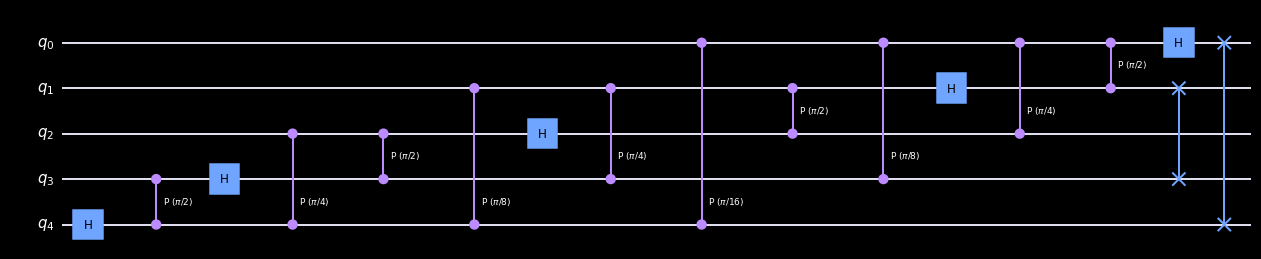

In [4]:

from qiskit.circuit.library import QFT
fc = QFT(5).decompose()
disp(fc.draw('mpl', style= style, fold=False))

In [7]:
from qiskit import Aer
sv_sim = Aer.get_backend('statevector_simulator')

In [8]:
my_circuit_sv = q.execute(fourior_circuit,sv_sim).result().get_statevector()
qiskit_circuit_sv =  q.execute(fc,sv_sim).result().get_statevector()

disp(my_circuit_sv.draw('latex'))
disp(qiskit_circuit_sv.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Quanum Phase Estimation 

**Goal** : To find the global phase of a qubit 

- Unitory matrix has **Eigen Vector** in the form of $\large e^{i\theta}$
- **Eigen Vectors** of an unitary Operator are **Orthogonal** to each other 

#### Problem Statement
$\displaystyle \large \mathcal{U}|\psi\rangle = e^{i\theta_\psi}|\psi\rangle \;\; \normalsize
\text{where} \;\; |\psi\rangle \;\;\text{is the eigen vector of} \;\; \mathcal{U} \;\; \text{operator}$

Can we estimate the $\theta_\psi$ given we can prepare $|\psi\rangle$ and also can apply $\mathcal{U}$ ob $|\psi\rangle$



 ###### 
 For Single qubit Phase Estimation we use this circuit diagram 
 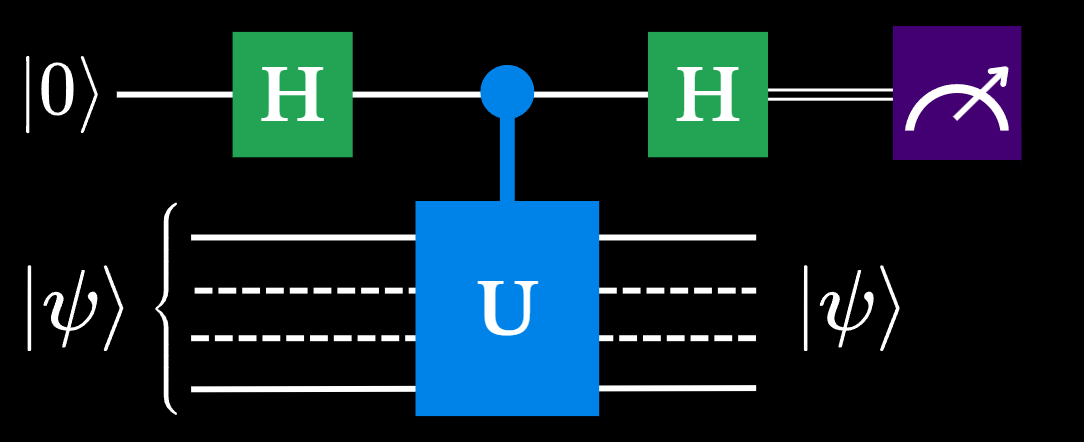

 
 here the filnal state of our circuit will be 
 $\frac{1}{2}\left[ \left(1+e^{i\theta}\right)|0\rangle + \left(1-e^{i\theta}\right)|1\rangle \right]|\psi\rangle$
 
 hence the probablity of measuring first Qubit as following 
 
  $P_{|0\rangle} = \left|\frac{1}{2}\left(1+e^{i\theta}\right) \right|^2 = \frac{1}{2}\left(1+\cos\theta\right)$
 
 $P_{|1\rangle} = \left|\frac{1}{2}\left(1-e^{i\theta}\right) \right|^2 = \frac{1}{2}\left(1-\cos\theta\right)$
 

#### Preparing Unitary 

In [9]:
from qiskit.circuit.library import CU1Gate
phase = np.deg2rad(10)
cu1 = CU1Gate(phase)

#### Testing unitary operator

In [10]:
# Creating Statevector Simulator for testing Unitary 
from qiskit import Aer 
Aer.backends()
sv_sim = Aer.get_backend('statevector_simulator')

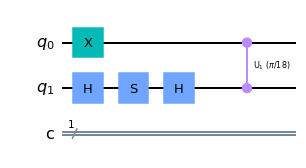

<IPython.core.display.Latex object>

In [11]:

test_circuit = q.QuantumCircuit(2,1)
test_circuit.x(0)
test_circuit.h(1)
test_circuit.s(1)
test_circuit.h(1)
test_circuit.append(cu1,[0,1])
disp(test_circuit.draw('mpl'))


result=q.execute(test_circuit,backend=sv_sim).result()
result.get_statevector().draw('latex')

#### Applying QPE on Single qubit state $|\psi\rangle$

In [12]:
## Create Controled Unitary gate 
phase = 90
phase = np.deg2rad(phase)
cu1 = CU1Gate(phase)

In [13]:
from qiskit.circuit.library import GlobalPhaseGate
gphase = GlobalPhaseGate(phase)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

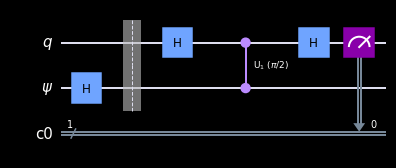

In [14]:
# Define QRegisters psi and q
psi = q.QuantumRegister(1, name='\psi')
q1 = q.QuantumRegister(1, name='q')
c1 = q.ClassicalRegister(1,name='c0')
# Creating Circuit
circ = q.QuantumCircuit(q1,psi,c1)
# Preparing Psi 
circ.h(1);

circ.barrier()


## Display Statevector
result = q.execute(circ,backend=sv_sim).result()
sv = result.get_statevector()
disp(sv.draw('latex'))


## Preparing QPE Part 
circ.h(0)
# circ.cu(0,1)
circ.append(cu1,[0,1])
# circ.p(phase,1)

circ.h(0)

## Display Statevector
result = q.execute(circ,backend=sv_sim).result()
sv = result.get_statevector()
disp(sv.draw('latex'))


circ.measure(0,0)

circ.draw('mpl',style=style)
# def add_phase(circ):

 ##### Let calculate the Phase from the Probability value 

 $P_{|0\rangle} = \left|\frac{1}{2}\left(1+e^{i\theta}\right) \right|^2 = \frac{1}{2}\left(1+\cos\theta\right)$
 $\implies \theta = \cos^{-1}(2P_{|0\rangle}-1)$
 
 $P_{|1\rangle} = \left|\frac{1}{2}\left(1-e^{i\theta}\right) \right|^2 = \frac{1}{2}\left(1-\cos\theta\right)$
  $\implies \theta = \cos^{-1}(1- 2P_{|1\rangle})$

In [15]:
def counts_probablity(counts, qbit = '0'):
    return counts['0']/sum(counts.values())
disp(counts_probablity({'0': 75207, '1': 24793}))

def probability_to_phase(p,bit=0):
    if bit==0: return np.arccos(2*p-1)
    elif bit==1: return np.arccos(1-2*p)
    else: raise "bit argument must int and in {0,1}"
probability_to_phase(.5)

0.75207

1.5707963267948966

In [16]:
qasm_sim = Aer.get_backend('qasm_simulator')
counts = q.execute(circ, qasm_sim, shots=10000).result().get_counts()
print(counts)
prob = counts_probablity(counts)
print(f'Probablity = {prob}')

{'0': 7497, '1': 2503}
Probablity = 0.7497


In [17]:
estimate_phase = np.rad2deg(probability_to_phase(prob,bit=0))
estimate_phase

60.03968774768114

$\Large a+ib \rightarrow re^{i\theta}$